# Capstone 3:  Climate Change Cause and Effect Relationships
##  ---    Exploratory Data Analysis ---

# 0. Import python libraries and Load wrangled data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller

In [3]:
def plotSeriesTogether(df1, v1, lab1, df2, v2, lab2, title, ylabel, xlabel, fact1=1, fact2=1, ymax=450, ymin=0):
    fig = plt.figure(figsize=(10, 6))  
    plt.grid(True)
    plt.plot(df1.index, df1[v1] * fact1, label=lab1)
    plt.plot(df2.index, df2[v2] * fact2, label=lab2)
    plt.legend(loc='best', shadow=True)
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylim([ymin, ymax])
    plt.plot();

In [4]:
EmissionsAnn= pd.read_csv('../Data/GasEmissions.csv', parse_dates=True, index_col=0)
Emis1958_Ann   = pd.read_csv('../Data/EmissionsSince1958.csv', parse_dates=True, index_col=0)
CO2      = pd.read_csv('../Data/CO2inAtmos.csv', parse_dates=True, index_col=0)
CO2Ann   = pd.read_csv('../Data/CO2Annual.csv', parse_dates=True, index_col=0)
LandTemp = pd.read_csv('../Data/LandTemp.csv', parse_dates=True, index_col=0)
LandTempAnn = pd.read_csv('../Data/LandTempAnnual.csv', parse_dates=True, index_col=0)
SeaTemp    = pd.read_csv('../Data/SeaTemp.csv', parse_dates=True, index_col=0)
SeaTempAnn = pd.read_csv('../Data/SeaTempAnnual.csv', index_col=0, parse_dates=True)
ArcIce   = pd.read_csv('../Data/ArcIce.csv', index_col=0, parse_dates=True)
ArcIceAnn = pd.read_csv('../Data/ArcIceAnnual.csv', index_col=0, parse_dates=True)
AntIce   = pd.read_csv('../Data/AntIce.csv', index_col=0, parse_dates=True)
AntIceAnn = pd.read_csv('../Data/AntIceAnnual.csv', index_col=0, parse_dates=True)


# 1. Analysis of The Source of CO2 and Its Air Concentration

We cannot confirm or reject the causality of CO<sub>2</sub> emissions on CO<sub>2</sub> concentrations in the air in this study.  We can analyze the correlation and make some inferences, insights and extrapolations from there.

The consensus causality is 
* Greenhouse Gases are produced and emitted into the air by power plants, factories, vehicles -->  
     * CO<sub>2</sub>, CH<sub>4</sub>, N<sub>2</sub>O and other greenhouse gas concentrations grow in the air around the planet -->
          * More solar rays reflected off the Earth are reflected back down by greenhouse gases -->
              * Earth land and sea temperatures rise, on average very slowly.              
              (The temperature rise signals are much smaller than the noise of monthly variations.) -->
                  * Air temperatures rise, on average very slowly, but it doesn't take much to change regional climates. -->
                  * Arctic and Antarctic Ocean ice shrinks  -->
                      * Darker liquid water absorbs more light and heat than lighter ice -->
                          * Many effects, most of them bad for the climate, people, and stability.
                              * Glaciers shrink and run off, turning ice into ocean water, raising sea level
                              * Ocean ice packs melting, partially counteracting the sea level rise because water                               takes up less volume than ice.
                              * More violent storms, hurricanes, tornadoes, snowstorms
                              * More erratic weather, sometimes drought, sometimes flooding
                              * Regional climates change, some become more arid, some wetter, some warmer
                              * Farming challenges to overcome various climate changes
                              * Property and infrastructure damage: flooded houses and septic tanks
                              * River changes, mudslides, disappearing coastal real estate
                          
We have time series data with very few missing values.  Most of the time series have monthly numbers available and some have daily numbers.  Unfortunately, the generation of excess CO<sub>2</sub> and other gases is only available as annual reports, compiled by industry producers of the gases and government agencies trying to keep track of the pollutants produced.

So we will begin our search for trends and correlations at the source with the Emissions and CO<sub>2</sub> time series.

Methane, Nitrous Oxide and other greenhouse gas concentration time series in the atmosphere are not available.

CO<sub>2</sub> concentrations are only available since March 1958, so we will do our comparison from that date.

For more information on the makeup of our atmosphere and more-detailed discussion of greenhouse gases, including maps of CO<sub>2</sub> concentration anomalies, see https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide/

## 1.1 Emissions and CO2 Time Series Graphs

In [5]:
CO2Ann.head(12)

,CO2 [ppm],seasonally adj [ppm],CO2 filled [ppm]
Date,,,
1958-12-31,315.333750,315.302500,315.236000
1959-12-31,315.981667,315.976667,315.981667
1960-12-31,316.909167,316.906667,316.909167
1961-12-31,317.643333,317.638333,317.643333
1962-12-31,318.454167,318.449167,318.454167
1963-12-31,318.992500,318.986667,318.992500
1964-12-31,319.201111,319.677778,319.618333
1965-12-31,320.036667,320.030000,320.036667
1966-12-31,321.369167,321.364167,321.369167


In [6]:
print(type(Emis1958_Ann.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [7]:
Emis1958_Ann


,country,Year,total_ghg,ghg_per_capita,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,co2_per_gdp,co2_per_unit_energy,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
Date,,,,,,,,,,,,,,,,,,,
1958-01-01,World,1958,NaN,NaN,8412.113,2.85,232.773,2.875,NaN,NaN,NaN,NaN,NaN,NaN,2.925687e+09,NaN,NaN,NaN,NaN
1959-01-01,World,1959,NaN,NaN,8848.509,5.19,436.396,2.970,NaN,NaN,NaN,NaN,NaN,NaN,2.979576e+09,NaN,NaN,NaN,NaN
1960-01-01,World,1960,NaN,NaN,9334.894,5.50,486.386,3.076,0.705,NaN,NaN,NaN,NaN,NaN,3.034950e+09,1.324584e+13,NaN,NaN,NaN
1961-01-01,World,1961,NaN,NaN,9356.003,0.23,21.109,3.026,NaN,NaN,NaN,NaN,NaN,NaN,3.091844e+09,NaN,NaN,NaN,NaN
1962-01-01,World,1962,NaN,NaN,9687.509,3.54,331.506,3.075,NaN,NaN,NaN,NaN,NaN,NaN,3.150421e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,World,2015,49854.98,6.756,35209.447,-0.10,-35.422,4.771,NaN,0.233,8660.01,1.173,3052.82,0.414,7.379797e+09,NaN,150882.037,20445.283,1.437
2016-01-01,World,2016,49358.03,6.613,35220.412,0.03,10.966,4.719,0.329,0.230,8550.06,1.146,3054.00,0.409,7.464022e+09,1.071343e+14,152944.938,20490.955,1.429
2017-01-01,World,2017,NaN,NaN,35696.349,1.35,475.936,4.729,0.323,0.229,NaN,NaN,NaN,NaN,7.547859e+09,1.104307e+14,155672.784,20624.761,NaN


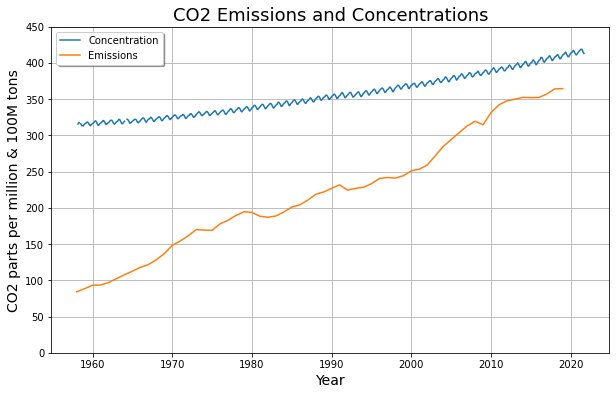

In [8]:
plotSeriesTogether(CO2, 'CO2 [ppm]', 'Concentration', Emis1958_Ann, 'co2', 'Emissions', 'CO2 Emissions and Concentrations', 'CO2 parts per million & 100M tons', 'Year', fact2=1/100, ymax=450)


The emissions are the orange line and the atmospheric concentration is the blue.  An easy pnemonic is to think of this graph as showing the orange emissions rising up from factory smokestacks to the blue sky.

Calculated emissions show a lot of minor inflection points on their climb upward.  Measured concentration is much more continuous.  Here we show the monthly measurements which show very steady seasonality. However, that seasonal sinusoid is only a small percentage of the overall value.  The average value is the largest component, the trend is smaller and the seasonality is the smallest component of the atmospheric concentration time series.

For comparison purposes from this point onward, we will use the annualized CO<sub>2</sub> atmospheric measurements, so that both time series have the same cardinality.  Furthermore, to align the data, we will adjust the month and day of the measurements to Jan 1 to match the emissions data.  Both data are measured over the entire span of the year, so the date assigned is arbitrary.



## 1.2 Correlation and Synchrony between CO<sub>2</sub> Emissions and Concentration

### 1.2.1 Python code to calculate correlation over whole period and over time windows

In [86]:
## Python code pattern thanks to Jin Hyun Cheong, PhD, published on Towards Data Science 
## at https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9

def plot_cross_correlation(df1, col1, df2, col2, fact1=1, fact2=1, xlabel='Year', ylabel='y'):
    dfc1 = df1[[col1]] * fact1
    dfc2 = df2[[col2]] * fact2
    
    Pair = dfc1.merge(dfc2, how='inner', on='Date')
    print(Pair.columns)

    overall_pearson_r = Pair.corr().iloc[0,1]
    print(f"Pandas computed Pearson r: {overall_pearson_r}")
    
    r, p = stats.pearsonr(Pair[col1], Pair[col2])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}")
    
    # Compute rolling window synchrony
    f,ax = plt.subplots(figsize=(10,5))
    Pair.rolling(window=10, center=True).median().plot(ax=ax)
    
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
    plt.show()
    return Pair

def plot_time_window_correlations (Pair, col0, col1, r_window_size=10, xlabel='Year', ylabel0='Mass & Concentration', color1='Purple',\
                                    title='CO2 data rolling window correlation'):
    '''Python code pattern thanks to Jin Hyun Cheong, PhD, published on Towards Data Science 
    at https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9 '''

    # Set window size to compute moving window synchrony.
    # Interpolate missing data.
    #df_interpolated = df.interpolate()
    # Compute rolling window synchrony
    rolling_r = Pair[col0].rolling(window=r_window_size, center=True).corr(Pair[col1])
    f,ax = plt.subplots(2,1,figsize=(14,6),sharex=True)
    Pair.rolling(window=5,center=True).median().plot(ax=ax[0])
    ax[0].set(xlabel=xlabel, ylabel=ylabel0)

    rolling_r.plot(ax=ax[1], color=color1)
    ax[1].set(xlabel=xlabel,ylabel='Pearson r')
    plt.suptitle(title)
    

### A. Pearson Correlation over this whole timeframe

Index(['CO2 [ppm]', 'co2'], dtype='object')
Pandas computed Pearson r: 0.9876623180747081
Scipy computed Pearson r: 0.9876623180747081 and p-value: 5.05307532841521e-50


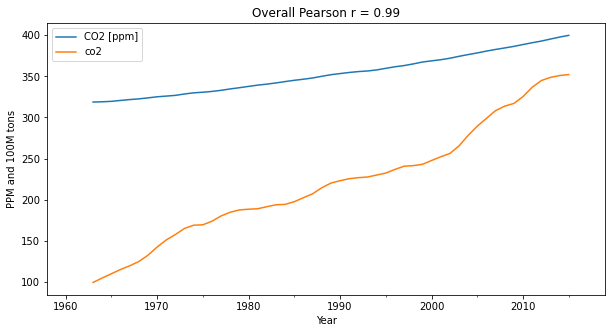

In [87]:
Atmo = CO2Ann[['CO2 [ppm]']]
Atmo.index = Atmo.index.map(lambda t: t.replace(month=1, day=1))

Pair = plot_cross_correlation(Atmo, 'CO2 [ppm]', Emis1958_Ann, 'co2', fact2=1/100, ylabel='PPM and 100M tons')

We have very high correlation between CO<sub>2</sub> emissions (orange) and concentration in the atmosphere (blue), across the time range from 1958 through 2019, about .99 !  The p-value is virtually 0 (50 zeroes), so the chance that these two datasets are uncorrelated is vanishingly small.

We cannot address causation with this data, but we have identified correlation between emissions and concentration of CO<sub>2</sub>.

### B. Pearson Correlation over time-localized windows

Min and max correlations: 0.7219135439391325 1982 0.9974769141302722 1987
411.425


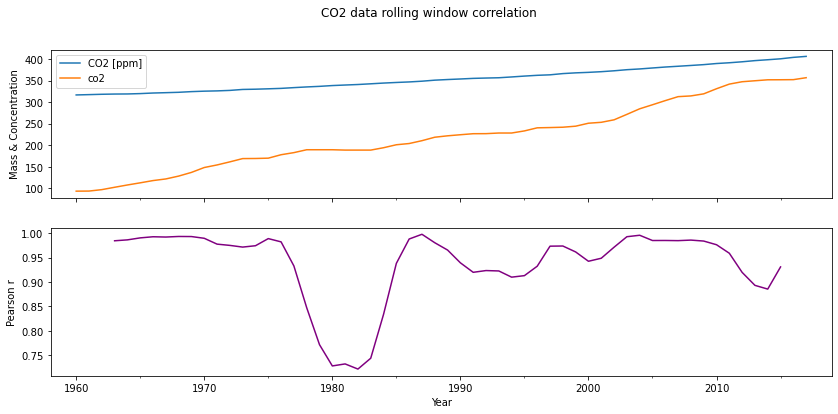

In [88]:
plot_time_window_correlations(Pair, 'co2', 'CO2 [ppm]')
print("Min and max correlations:", rolling_r.min(), rolling_r.argmin() + 1958 , rolling_r.max(), rolling_r.argmax() + 1958)
print (Pair['CO2 [ppm]'].max())

The Pearson correlation coefficient remains near .99 over most of this timeline, with a big dip from 1976 to 1986 and a smaller dip in the early 1990s.  The correlation was down to the neighborhood of .73 between 1980 and 1983.  

Looking at the two curves, we see that the growth of emissions slowed during this time period, while the atmospheric concentration of CO<sub>2</sub> continued growing at a steady pace.  This suggests that greenhouse gas buildup has some momentum and even if the world does stabilize or reduce emissions, it may take some time for the atmospheric concentration growth to respond and abate.

## 1.3 Related Rates

Now that we have shown that CO<sub>2</sub> emissions and atmospheric concentrations are correlated, let's switch gears from statistics to kinematics, ratios and measurements of chemicals.  We'll compare the ratios of values and rates over time.

The units of the ratio CO2 \[ppm\] / co2 are parts per million / 100 M tons.  Not very meaningful.  The biggest notion to get here is that the parts per million is a measure of the CO<sub>2</sub> gas molecules per million "air" molecules.  And the co2 emissions are in 100 M tons, a mass unit, of CO<sub>2</sub> gas molecules produced.  One might expect to see volumes, but the atmospheric concentration is really a percentage of molecule masses.  

As a reminder air is a gaseous mixture containing approximately 78% Nitrogen (N<sub>2</sub>), 21% Oxygen (O<sub>2</sub>), 0.93 % Argon (Ar), and as of the latest measurement in this data, 0.0411% CO<sub>2</sub>.  Reference: https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide/

It seems reasonable that the amount of CO<sub>2</sub> humans emit each year should build up in the atmosphere, and it's a known fact that it [doesn't break down in the atmosphere for 300 to 1000 years:](https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide/#:~:text=Carbon%20dioxide%20is%20a%20different,between%20300%20to%201%2C000%20years.) From this link: 
> Carbon dioxide is a different animal, however. Once it’s added to the atmosphere, it hangs around, for a long time: between 300 to 1,000 years.

So let's look to see if CO<sub>2</sub> atmospheric concentration (the blue line in the graphs above) is an integral function of the yearly emissions.

Let's see what the data tells about the CO<sub>2</sub> growth over the last half century using the annual values, annual differences, and ratios of each.

In [36]:
Pair['diff_conc']  = Pair['CO2 [ppm]'] - Pair['CO2 [ppm]'].shift(1)
Pair['diff_emit']  = Pair['co2'] - Pair['co2'].shift(1)
Pair['ratio'] = Pair['CO2 [ppm]'] / Pair.co2
Pair['ratio_diffs'] = Pair['diff_conc'] / Pair['diff_emit']
Pair['ratio_dc_emit'] = 100 * Pair['diff_conc'] / Pair.co2
Pair

,CO2 [ppm],co2,diff_conc,diff_emit,ratio,ratio_diffs,ratio_dc_emit
Date,,,,,,,
1958-01-01,315.333750,84.12113,NaN,NaN,3.748568,NaN,NaN
1959-01-01,315.981667,88.48509,0.647917,4.36396,3.571016,0.148470,0.732233
1960-01-01,316.909167,93.34894,0.927500,4.86385,3.394888,0.190693,0.993584
1961-01-01,317.643333,93.56003,0.734167,0.21109,3.395075,3.477979,0.784701
1962-01-01,318.454167,96.87509,0.810833,3.31506,3.287266,0.244591,0.836988
...,...,...,...,...,...,...,...
2015-01-01,400.867500,352.09447,2.159167,-0.35421,1.138523,-6.095725,0.613235
2016-01-01,404.209167,352.20412,3.341667,0.10965,1.147656,30.475756,0.948787
2017-01-01,406.515000,356.96349,2.305833,4.75937,1.138814,0.484483,0.645958


Use the Augmented Dickey-Fuller test to see if any of these time series are stationary.

In [37]:
Pair.fillna(0, inplace=True)
def DickeyFuller(df, col):
    result = adfuller(df)
    print('Dickey-Fuller test of %s' % col)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
for c in Pair.columns:
    DickeyFuller(Pair[c], c)

Dickey-Fuller test of CO2 [ppm]
ADF Statistic: 6.286068
p-value: 1.000000
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Dickey-Fuller test of co2
ADF Statistic: -0.159704
p-value: 0.943157
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Dickey-Fuller test of diff_conc
ADF Statistic: -0.862456
p-value: 0.800085
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596
Dickey-Fuller test of diff_emit
ADF Statistic: -5.638941
p-value: 0.000001
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593
Dickey-Fuller test of ratio
ADF Statistic: -3.938945
p-value: 0.001766
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
Dickey-Fuller test of ratio_diffs
ADF Statistic: -2.715698
p-value: 0.071361
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594
Dickey-Fuller test of ratio_dc_emit
ADF Statistic: -8.527367
p-value: 0.000000
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593


As we can tell with the naked eye, both original time series are not stationary.

The annual change rate of concentration is not stationary.

The annual change rate of emissions is stationary, with greater than 99% certainty.

The ratio of concentration over emission is stationary, with greater than 99% certainty.

The ratio of the annual changes is marginal, with an 8 or 9% chance of being non-stationary.

The ratio of the annual change in concentration over annual emission is stationary, with much greater than 99% certainty.


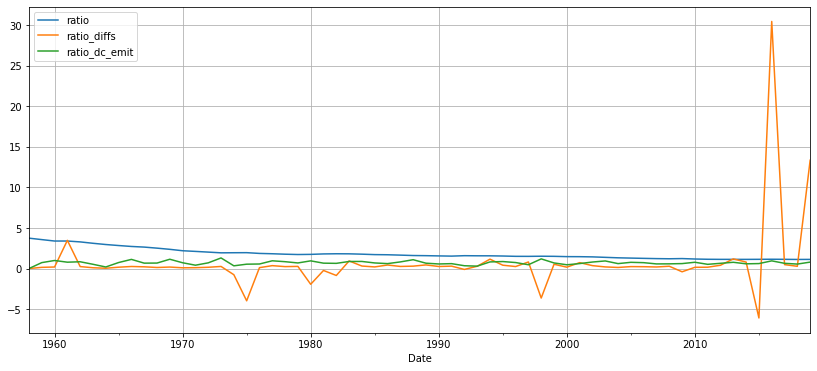

In [38]:
Pair.iloc[:,4:].plot(figsize=(14,6),  grid=True, kind='line');

The ratio of concentration to annual emissions falls off from 3.75 to 1.12, but if we think about it, that's a meaningless relationship.  

The ratio of annual concentration difference to annual emission difference also misses the mark.  We care about annual concentration difference, but we care about annual emissions, not the differences in them year to year.

If concentration is an integral function of annual emissions, then the ratio of concentration differences to annual emissions (ratio_dc_emit) is the ratio of interest.  Indeed it is stationary, always positive and close to constant without large deviations.  This is the relationship between emissions and atmospheric concentration that we are after.

## 1.4 Time Series Model Plan

In the modeling section, we will use the SARIMAX time series model with annual CO<sub>2</sub> emissions as our exogenous variable, and concentration as our enogenous target variable.

# 2.  CO<sub>2</sub> Atmospheric Concentration and Surface Temperatures

Let's compare the concentration curve with the Land and Sea Temperature curves.

## 2.1 Concentration vs. Land Temperature

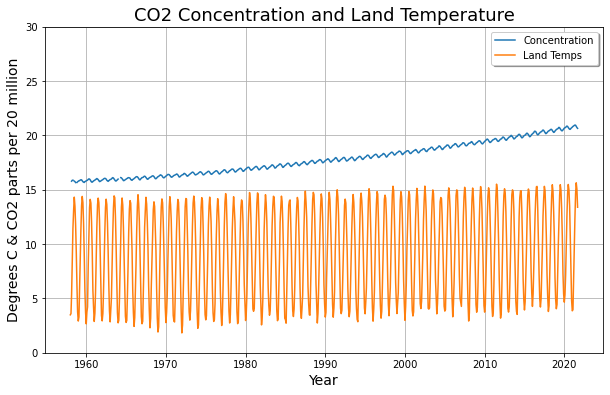

In [47]:
plotSeriesTogether(CO2, 'CO2 [ppm]', 'Concentration', LandTemp[LandTemp.index > '1957-12-31'], 'Monthly', 'Land Temps', 'CO2 Concentration and Land Temperature', 'Degrees C & CO2 parts per 20 million', 'Year', fact1=1/20, ymax=30)

Looking at the full monthly datasets, we can see the seasonality in land temperatures is much stronger than that in the CO<sub>2</sub> concentration.  We can also tell that the land temperature has followed concentration up since 1958, but not as rapidly.  Let's look at the annual datasets to get a clearer image of the trends.

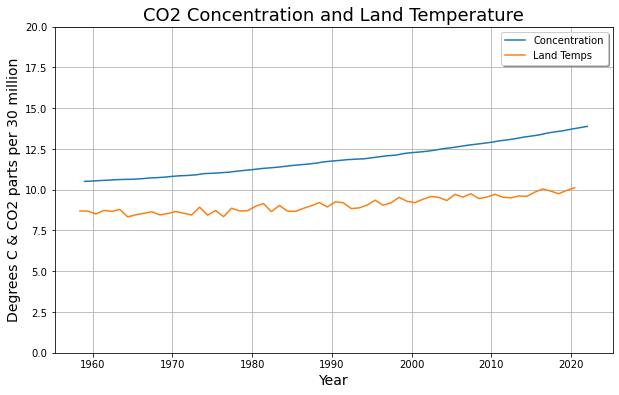

In [51]:
plotSeriesTogether(CO2Ann, 'CO2 [ppm]', 'Concentration', LandTempAnn[LandTempAnn.index > '1957-12-31'], 'Annual', 'Land Temps', 'CO2 Concentration and Land Temperature', 'Degrees C & CO2 parts per 30 million', 'Year', fact1=1/30, ymax=20)

Dispensing with the seasonality and zooming in by dividing concentration by 30, we can clearly see that concentration is curving upward with a slight acceleration.  It looks like land temperature may also have a bit of an acceleration curve, but it appears to be smaller.

Let's look at Sea Temperature now.

## 2.2 Concentration vs. Sea Temperature

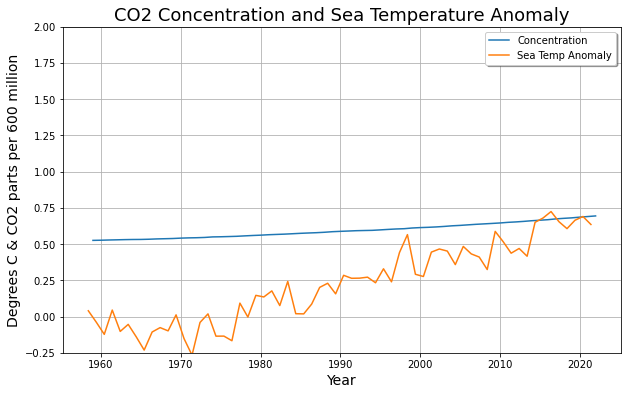

In [59]:
plotSeriesTogether(CO2Ann, 'CO2 [ppm]', 'Concentration', SeaTempAnn[SeaTempAnn.index > '1957-12-31'], 'anomaly', 'Sea Temp Anomaly', 'CO2 Concentration and Sea Temperature Anomaly', 'Degrees C & CO2 parts per 600 million', 'Year', fact1=1/600, ymin=-.25, ymax=2)

Remember we have sea temperatures in anomaly, or offset since an average in the mid-20th century.  That's why the temps start around 0<sup>o</sup> C.  Sea temperatures are definitely rising since 1985.

Globally averaged temperatures are like atmospheric CO<sub>2</sub> concentration at a (Hawaiian) point in the middle of the Pacific Ocean. They are both values that just exist, varying over time, while annual CO<sub>2</sub> emmissions are changes to the environment that add up over time.  So the cause/effect relationship between concentration and temperature rise has a different character than the relationship between emissions and concentration.

## 2.2 Correlation and Synchrony between CO<sub>2</sub>  Concentration and Temperatures
